# Setup CoLab environment (optinal)

In [ ]:
# 掛載使用者的Google雲端硬碟 (drive/MyDrive) 到 Colab 的工作磁碟
from google.colab import drive
drive.mount('/content/drive')

[Mount Google Drive to Colab](https://raw.githubusercontent.com/mingfujacky/Lecture-Python/9b438a513a1f05d24d8586906f1448a59149d497/files/image/mount_google_drive.png)

# Import Library

In [2]:
import pandas as pd
from pathlib import Path

# Load File

In [5]:
# Via URL to load 學測分數 dataset (https://bitly.com/gradescsv)
df = pd.read_csv('https://bitly.com/gradescsv')
df.tail(3)

,姓名,國文,英文,數學,自然,社會
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15
99,農揚勇,9,11,12,12,10


In [10]:
# Locate local file to load 學測分數 dataset
target_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'grades.csv'
df = pd.read_csv(target_csv_path)
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


# Understand data

In [15]:
df.shape
df.dtypes
df.head(3)
df.tail()
df.describe() # 統計敘述

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


In [17]:
# 學科間的相關性
# R值相關程度之高低，在正負0.3之間（即0.3至-0.3之間）稱為低度相關；
# 在正負0.3-0.6之間（即指介於0.3至0.6，-0.3至-0.6之間）稱為中度相關；
# 而在正負0.6至0.9之間（即指在0.6至0.9，-0.6至-0.9之間）則稱為高度相關；
# 若是R值為正負1，即表示完全相關。
# df[['國文', '英文', '數學', '自然', '社會']].corr()
df[['國文', '英文']].corr()


,國文,英文
國文,1.000000,0.160158
英文,0.160158,1.000000


# 國文分數的分析

Mean:  11.39
STD:  2.196852661459484


<Axes: ylabel='Frequency'>

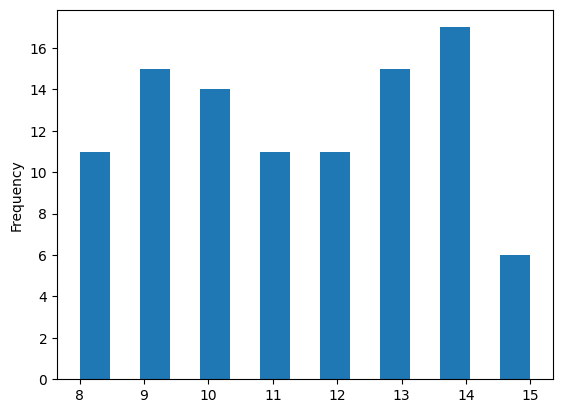

In [21]:
df['國文']                          # display the '國文' column
print('Mean: ', df['國文'].mean())  # 國文平均
print('STD: ', df['國文'].std())    # 國文標準差
df['國文'].plot(kind='hist', bins=15) # 國文成績直方圖

# 錄取十名學生
- 依主科加權(數學 * 1.5 + 英文 *1.5)排序
- 同主科加權者，依總級分排序

In [25]:
# 計算新增欄位值
df['主科加權'] = df['數學'] * 1.5 + df['英文']*1.5
df['總級分'] = df['國文'] + df['英文'] + df['數學'] + df['自然'] + df['社會']
df.head(10)


,姓名,國文,英文,數學,自然,社會,主科加權,總級分
0,劉俊安,9,10,15,10,13,37.5,57
1,胡玉華,10,10,10,8,9,30.0,47
2,黃淑婷,13,15,8,11,14,34.5,61
3,陳上紫,10,10,8,9,14,27.0,51
4,崔靜成,13,12,14,12,13,39.0,64
5,張雅岳,13,12,12,12,8,36.0,57
6,梁俊翔,11,13,10,10,14,34.5,58
7,林金鳳,8,9,10,10,8,28.5,45
8,許協旺,9,9,12,10,10,31.5,50
9,郭雅惠,10,15,12,11,9,40.5,57


In [26]:
# 排序
df.sort_values(by = ['主科加權', '總級分'], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,主科加權,總級分
73,吳志遠,13,15,15,8,8,45.0,59
57,胡淳茜,12,15,14,13,11,43.5,65
83,李士賢,10,14,15,13,13,43.5,65
36,詹威德,12,13,15,10,14,42.0,64
68,劉麗芬,8,14,14,14,14,42.0,64
66,邱盈俊,10,14,14,13,8,42.0,59
70,葉儀依,9,13,15,8,14,42.0,59
80,施雅鈴,13,15,12,13,13,40.5,66
25,蔡亦瑄,13,13,14,13,12,40.5,65
37,曾怡君,11,12,15,13,14,40.5,65
